In [1]:
import matplotlib.pyplot as plt
import mplstereonet as stnt
import numpy as np
import pandas as pd
from pathlib import Path as pth
import sys

sys.path.append(str(pth.cwd().parents[0]))
from utils import *

In [15]:
# Auto KD Tree Facets
fct = pd.read_csv('../Files/Assgn_02/BD_auto_facets.csv', sep=';')
fct.columns = [name.lstrip().lower() for name in fct.columns] # Remove space from column names
fct['strike'] = dip_direction_to_strike(fct['dip dir.']) # Convert dip dir. to strike


# Fracture sets
fs_pth = "../Files/Assgn_02/fracture_sets"
fs1 = pd.read_csv(f'{fs_pth}/set_1.txt', sep='\t')
# Extract the index from notes
fs1['Notes'] = fs1['Notes'].apply(lambda x: int(x.split("|")[2]))
# Filter the KD Tree Facets by the index
fs1 = fct[fct['index'].isin(fs1.Notes.to_list())]

fs2 = pd.read_csv(f'{fs_pth}/set_2.txt', sep='\t')
fs2['Notes'] = fs2['Notes'].apply(lambda x: int(x.split("|")[2]))
fs2 = fct[fct['index'].isin(fs2.Notes.to_list())]

fs3 = pd.read_csv(f'{fs_pth}/set_3.txt', sep='\t')
fs3['Notes'] = fs3['Notes'].apply(lambda x: int(x.split("|")[2]))
fs3 = fct[fct['index'].isin(fs3.Notes.to_list())]

fs4 = pd.read_csv(f'{fs_pth}/set_4.txt', sep='\t')
fs4['Notes'] = fs4['Notes'].apply(lambda x: int(x.split("|")[2]))
fs4 = fct[fct['index'].isin(fs4.Notes.to_list())]

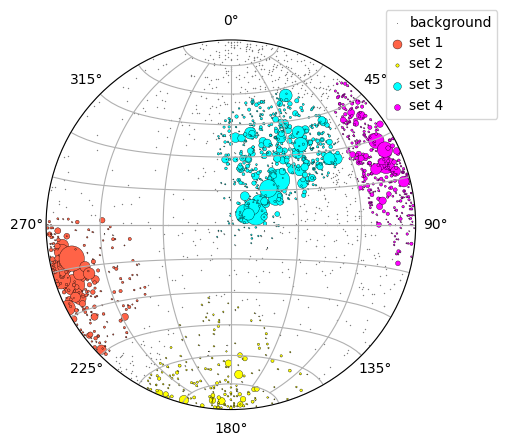

In [29]:
fig, ax = stnt.subplots()
ax.grid()

#ax.plane(fct.strike, fct.dip, color='darkred', lw=0.1, alpha=0.15)
ax.pole(fct.strike, fct.dip, color='gray', s=1, ec='k', 
            marker='o',ls='-',lw=0, label='background')
ax.pole(fs1.strike, fs1.dip, color='tomato', s=fs1.surface*20, ec='k', 
            marker='o',ls='-',lw=0.25, label='set 1')
ax.pole(fs2.strike, fs2.dip, color='yellow', s=fs2.surface*20, ec='k', 
            marker='o',ls='-',lw=0.25, label='set 2')
ax.pole(fs3.strike, fs3.dip, color='cyan', s=fs3.surface*20, ec='k', 
            marker='o',ls='-',lw=0.25, label='set 3')
ax.pole(fs4.strike, fs4.dip, color='magenta', s=fs4.surface*20, ec='k', 
            marker='o',ls='-',lw=0.25, label='set 4')
ax.legend(bbox_to_anchor=(0.90,1.1),handletextpad=0.5,handlelength=0.8,markerscale=0.5)
plt.savefig('../Figures/Fracture_set_stereonet.png', dpi=200, facecolor='white', 
            edgecolor='none', bbox_inches='tight')
plt.show()

In [4]:
# Normal place orientations for different outcrop fractures by face
# Face 1
npl_fc1 = pd.read_csv("../Files/Assgn_02/BD_face_1_norm_pl_meas_planes.csv")
npl_fc1.columns = [name.lower() for name in npl_fc1.columns]
npl_fc1 = npl_fc1[~npl_fc1.index.isin([11,19,20,25,33])]

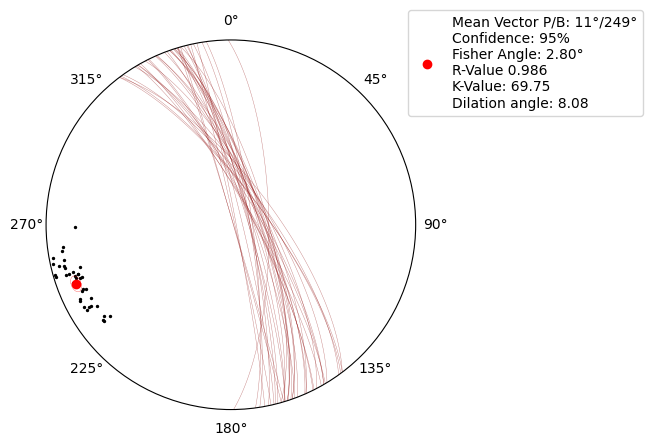

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='stereonet')
strk,dips = npl_fc1.strike, npl_fc1.dip
confidence = 95
vector, stats = stnt.find_fisher_stats(strk, dips, conf=confidence, measurement="poles")
template = (u"Mean Vector P/B: {plunge:0.0f}\u00B0/{bearing:0.0f}\u00B0\n"
            "Confidence: {conf}%\n"
            u"Fisher Angle: {fisher:0.2f}\u00B0\n"
            u"R-Value {r:0.3f}\n"
            "K-Value: {k:0.2f}\n"
            "Dilation angle: {d:0.2f}")
label = template.format(plunge=vector[0], bearing=vector[1], conf=confidence, 
                        r=stats[0], fisher=stats[1], k=stats[2], d=mean_dilation_angle(stats[2]))

ax.plane(strk, dips, color='darkred', lw=0.3, alpha=0.5)
ax.pole(strk, dips, color='k', s=2, ls='-')
ax.line(vector[0], vector[1], color="red", label=label)
ax.cone(vector[0], vector[1], stats[1], fc="None", ec="red", lw=0.2)
ax.legend(bbox_to_anchor=(0.96, 1.1), numpoints=1)
plt.savefig('../Figures/Midterm_fracture_fisher_stats.png', dpi=200, facecolor='white', 
            edgecolor='none', bbox_inches='tight')
plt.show()